In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [3]:
'''
Importing the text file which contains the chat of the group
in read mode using utf-8 encoding!
This is my clg group chat,it contains chats from 2018,so its a very big
file,will preview it after we've done adding regular expressions!

'''

f = open('WhatsApp Chat with 5th Sem UNOFFICIAL.txt','r',encoding='utf-8')

data = f.read()




In [4]:
dummy = data.split('\n')
dummy

['9/1/20, 11:51 AM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '9/8/20, 9:51 PM - +91 96324 67247: <Media omitted>',
 '10/16/20, 10:01 AM - +91 96324 67247: Tdys ADE class is scheduled at 3:30 to 4:30 pm instead of 10:30 am',
 '10/16/20, 10:03 AM - +91 96324 67247: This message was deleted',
 '10/16/20, 10:03 AM - +91 96324 67247: So tdys schedule goes as follows :',
 '',
 '11:30 to 12:30 pm ---- Software engineering',
 '',
 '12:45 to 1:45 pm ---- DSA ',
 '',
 '2:30 to 3:30 pm ---- software engineering',
 '',
 '3:30 to 4:30 pm ----- ADE .',
 '10/16/20, 11:27 AM - +91 96324 67247: <Media omitted>',
 '10/16/20, 11:40 AM - +91 96324 67247: Geeta mam (Software engineering) will download attendance before she start her class it seems so do join fast .',
 '10/16/20, 1:45 PM - +91 96324 67247: 2:30 to 3:30 pm we have software engineering class',
 '10/16/20, 1:45 PM - +91 96324 67247: Knowledge

In [5]:
'''
Example for dry run : '16/08/18, 20:09 - '

\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s
[0-9][1,2}/

the first part "d{1,2}" this means here we can have one or 2 digits
then after we have "/"
then after we have "d{1,2}" again,same we can have one or 2 digits
then after we have "/"
then after we have "d{2,4}" here we check for 2 or more digits
then we have a space represented as "\s"
then we have hour representation it can take either one or 2 digits 
then we have a seperator ":" 
and the pattern repeats so on..

'''

# username and message in different col

patternn = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s\w+\s-'
pattern ='[0-9]{1,2}/[0-9]{1,2}/[0-9]{1,2}[, ]\s[0-9]{1,2}:[0-9]{1,2}\s((?:A|P)\.?M\.?)\s-'
#pattern ='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+)'
messages = re.split(patternn,data)[1:]
#me = re.split(pattern,data)[1:]
print(len(messages))
#print(messages)



## extracting dates as well in different col

#dates = re.findall(pattern,data)
dates = re.findall(patternn,data)

print(len(dates))
#print(dates)


3961
3961


In [6]:
# this is a simple time string,we will appply this kind of transformation
# inorder to get the date and the time for our analysis
#5/16/21, 1:45 PM -'

# string = '16/08/18, 20:09 - '
# string = string.split(',')
# date,time = string[0],string[1]
# time = time.split('-')
# time = time[0].strip()

# print(date+" and "+time)

string ='5/16/21, 1:45 PM -'
string = string.split(',')
date,time =string[0],string[1]
time =time.split('-')
time=time[0].strip()
time=time.split(" ")
time=time[0]

print(date+" and "+time)

5/16/21 and 1:45


In [7]:
# this function is to seperate the time and date

def gettimeanddate(string):
    # string = string.split(',')
    # date,time = string[0],string[1]
    # time = time.split('-')
    # time = time[0].strip()
    
    string = string.split(',')
    date,time =string[0],string[1]
    time =time.split('-')
    time=time[0].strip()
    time=time.split(" ")
    time=time[0]
    
    
    return date+" "+time




In [8]:
# creating a dataframe for messages and their dates

df = pd.DataFrame({'user_messages':messages,
                   'message_date':dates})

df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. ...,9/1/20 11:51
1,+91 96324 67247: <Media omitted>\n,9/8/20 9:51
2,+91 96324 67247: Tdys ADE class is scheduled ...,10/16/20 10:01
3,+91 96324 67247: This message was deleted\n,10/16/20 10:03
4,+91 96324 67247: So tdys schedule goes as fol...,10/16/20 10:03


In [9]:
df['user_messages']

0        Messages and calls are end-to-end encrypted. ...
1                      +91 96324 67247: <Media omitted>\n
2        +91 96324 67247: Tdys ADE class is scheduled ...
3             +91 96324 67247: This message was deleted\n
4        +91 96324 67247: So tdys schedule goes as fol...
                              ...                        
3956     Your security code with Sammed Kleit changed....
3957     Your security code with +91 95918 12275 chang...
3958     Your security code with +91 95918 12275 chang...
3959     Your security code with +91 76249 28852 chang...
3960                      Pramod Kleit: <Media omitted>\n
Name: user_messages, Length: 3961, dtype: object

In [10]:
'''
if we observe the usermessage,we find that the 
username is attached with the user message,so i need to get rid
of this,for that i will use the concept of the regular expression

sample of the regular expression output

['', 'Chinmayee', 'Hello this is official grup\n']

so here we can see that the username is at index 1 and message is at index2

sometimes it happens that we get the group notification,so 
for that case we have to handle it accordingly!


 Chinmayee: Hello this is official grup
 
 Chinmayee added you\n-->['Chinmayee added you','\n']

'''

users = []
messages = []

for message in df['user_messages']:
    
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

        
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
        
df['User'] = users

df['message'] = messages


def getstring(text):
    return text.split('\n')[0]

df['message'] = df['message'].apply(lambda text:getstring(text))


df = df.drop(['user_messages'],axis=1)
df = df[['message','date','User']]

df = df.rename(columns={'message':'Message',
                       'date':'Date'})


df.head()

,Message,Date,User
0,Messages and calls are end-to-end encrypted. ...,9/1/20 11:51,Group Notification
1,<Media omitted>,9/8/20 9:51,+91 96324 67247
2,Tdys ADE class is scheduled at 3:30 to 4:30 pm...,10/16/20 10:01,+91 96324 67247
3,This message was deleted,10/16/20 10:03,+91 96324 67247
4,,10/16/20 10:03,+91 96324 67247


In [11]:
# 16/08/18 20:09
    
# YYYY-MM-DD

In [12]:
df.shape

(3961, 3)

In [13]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()


df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute


df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. ...,9/1/20 11:51,Group Notification,2020-09-01,2020,9,September,1,Tuesday,11,51
1,<Media omitted>,9/8/20 9:51,+91 96324 67247,2020-09-08,2020,9,September,8,Tuesday,9,51
2,Tdys ADE class is scheduled at 3:30 to 4:30 pm...,10/16/20 10:01,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,1
3,This message was deleted,10/16/20 10:03,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,3
4,,10/16/20 10:03,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,3


In [14]:
print(len(df['User'].unique()))
uul=df['User'].unique().tolist()
print(uul)
#df[df['User'] == 'jagass']

142
['Group Notification', ' +91 96324 67247', ' +91 89712 94982', ' +91 91130 84346', ' Dheeraj', ' Nishita', ' +91 70229 93521', ' +91 84310 59971', ' Kiran Kleit', ' +91 80731 09545', ' Aishwarya', ' +91 96861 64553', ' Amar Kleit', ' +91 73382 47283', ' +91 97313 84625', ' +91 98440 27967', ' Chirag', ' Pramod Kleit', ' +91 73383 62719', ' +91 94818 87938', ' Prithvi KLE', ' Achyut More', ' +91 80734 52661', ' +91 95911 51888', ' +91 99014 20118', ' Muzammil', ' +91 89713 58876', ' +91 97431 50204', ' +91 96061 62001', ' +91 87227 41058', ' +91 82175 40246', ' +91 98458 55064', ' +91 88618 93898', ' Kartik Kleit', ' +91 83102 91723', ' +91 6362 228 739', ' +91 80880 97956', ' +91 80726 87940', ' +91 88671 18991', ' Pranay', ' +91 90197 51682', ' +91 96114 97616', ' +91 83105 83981', ' +91 81233 97809', ' +91 87228 88552', ' +91 99166 30083', ' +91 81238 19424', ' +91 90086 58939', ' +91 81509 66199', ' +91 94832 16673', ' Kiran', ' +91 81979 06207', ' +91 80734 47907', ' +91 84591 

In [15]:
df[df['User'] == ' Pramod Kleit']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
81,Guys join fast ma'am is going to take attendance,10/20/20 10:28,Pramod Kleit,2020-10-20,2020,10,October,20,Tuesday,10,28
960,Yeah,11/3/20 3:53,Pramod Kleit,2020-11-03,2020,11,November,3,Tuesday,3,53
981,When will he conduct?,11/5/20 12:39,Pramod Kleit,2020-11-05,2020,11,November,5,Thursday,12,39
982,"Date,Timings?",11/5/20 12:39,Pramod Kleit,2020-11-05,2020,11,November,5,Thursday,12,39
1365,Yes👍🏻,11/10/20 11:15,Pramod Kleit,2020-11-10,2020,11,November,10,Tuesday,11,15
...,...,...,...,...,...,...,...,...,...,...,...
3922,This message was deleted,11/10/21 10:24,Pramod Kleit,2021-11-10,2021,11,November,10,Wednesday,10,24
3923,This message was deleted,11/10/21 10:24,Pramod Kleit,2021-11-10,2021,11,November,10,Wednesday,10,24
3945,<Media omitted>,11/28/21 8:36,Pramod Kleit,2021-11-28,2021,11,November,28,Sunday,8,36
3947,<Media omitted>,11/29/21 2:50,Pramod Kleit,2021-11-29,2021,11,November,29,Monday,2,50


In [16]:
user_list = df['User'].unique().tolist()
print(user_list)

['Group Notification', ' +91 96324 67247', ' +91 89712 94982', ' +91 91130 84346', ' Dheeraj', ' Nishita', ' +91 70229 93521', ' +91 84310 59971', ' Kiran Kleit', ' +91 80731 09545', ' Aishwarya', ' +91 96861 64553', ' Amar Kleit', ' +91 73382 47283', ' +91 97313 84625', ' +91 98440 27967', ' Chirag', ' Pramod Kleit', ' +91 73383 62719', ' +91 94818 87938', ' Prithvi KLE', ' Achyut More', ' +91 80734 52661', ' +91 95911 51888', ' +91 99014 20118', ' Muzammil', ' +91 89713 58876', ' +91 97431 50204', ' +91 96061 62001', ' +91 87227 41058', ' +91 82175 40246', ' +91 98458 55064', ' +91 88618 93898', ' Kartik Kleit', ' +91 83102 91723', ' +91 6362 228 739', ' +91 80880 97956', ' +91 80726 87940', ' +91 88671 18991', ' Pranay', ' +91 90197 51682', ' +91 96114 97616', ' +91 83105 83981', ' +91 81233 97809', ' +91 87228 88552', ' +91 99166 30083', ' +91 81238 19424', ' +91 90086 58939', ' +91 81509 66199', ' +91 94832 16673', ' Kiran', ' +91 81979 06207', ' +91 80734 47907', ' +91 84591 0355

In [17]:
user_list.remove('Group Notification')
user_list.insert(0, "Overall")
user_list.sort()
print(user_list)

[' +91 6362 228 739', ' +91 6362 537 540', ' +91 6362 971 330', ' +91 6363 011 426', ' +91 6363 932 415', ' +91 6364 306 733', ' +91 6364 828 536', ' +91 70229 22837', ' +91 70229 93521', ' +91 70260 80422', ' +91 73382 47283', ' +91 73383 62719', ' +91 73495 95339', ' +91 74834 15012', ' +91 76194 92462', ' +91 76196 04911', ' +91 77600 96532', ' +91 77601 88752', ' +91 77952 42524', ' +91 78295 14793', ' +91 80506 30132', ' +91 80726 87940', ' +91 80731 09545', ' +91 80733 79173', ' +91 80734 47907', ' +91 80734 52661', ' +91 80735 04259', ' +91 80880 97956', ' +91 80884 35095', ' +91 80888 70877', ' +91 81055 29736', ' +91 81231 05012', ' +91 81233 97809', ' +91 81238 19424', ' +91 81509 66199', ' +91 81518 74532', ' +91 81975 16386', ' +91 81979 06207', ' +91 82175 40246', ' +91 82178 74104', ' +91 83101 16642', ' +91 83102 91723', ' +91 83105 83981', ' +91 84310 59971', ' +91 84319 54913', ' +91 84319 70590', ' +91 84319 71110', ' +91 84319 77732', ' +91 84591 03557', ' +91 87227 

In [18]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

19305


In [19]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 '<Media',
 'omitted>',
 'Tdys',
 'ADE',
 'class',
 'is',
 'scheduled',
 'at',
 '3:30',
 'to',
 '4:30',
 'pm',
 'instead',
 'of',
 '10:30',
 'am',
 'This',
 'message',
 'was',
 'deleted',
 '<Media',
 'omitted>',
 'Geeta',
 'mam',
 '(Software',
 'engineering)',
 'will',
 'download',
 'attendance',
 'before',
 'she',
 'start',
 'her',
 'class',
 'it',
 'seems',
 'so',
 'do',
 'join',
 'fast',
 '.',
 '2:30',
 'to',
 '3:30',
 'pm',
 'we',
 'have',
 'software',
 'engineering',
 'class',
 'Knowledge',
 'sharing',
 'will',
 'be',
 'conducted',
 'on',
 'Monday',
 '2:30',
 'to',
 '3:30',
 'pm',
 'on',
 'topic',
 'communication',
 'skills',
 'Meeting',
 'is',
 'scheduled',
 'join',
 'fast',
 'We',
 'have',
 'computer',
 'organisation',
 'class',
 '@',
 '11:30'

In [20]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
1,<Media omitted>,9/8/20 9:51,+91 96324 67247,2020-09-08,2020,9,September,8,Tuesday,9,51
5,<Media omitted>,10/16/20 11:27,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,11,27
86,<Media omitted>,10/20/20 12:09,+91 96324 67247,2020-10-20,2020,10,October,20,Tuesday,12,9
135,<Media omitted>,10/20/20 2:44,+91 89713 58876,2020-10-20,2020,10,October,20,Tuesday,2,44
190,<Media omitted>,10/20/20 11:43,+91 82175 40246,2020-10-20,2020,10,October,20,Tuesday,11,43
...,...,...,...,...,...,...,...,...,...,...,...
3940,<Media omitted>,11/25/21 5:53,+91 87228 88552,2021-11-25,2021,11,November,25,Thursday,5,53
3941,<Media omitted>,11/25/21 9:09,Aishwarya,2021-11-25,2021,11,November,25,Thursday,9,9
3945,<Media omitted>,11/28/21 8:36,Pramod Kleit,2021-11-28,2021,11,November,28,Sunday,8,36
3947,<Media omitted>,11/29/21 2:50,Pramod Kleit,2021-11-29,2021,11,November,29,Monday,2,50


In [21]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Overall')].shape
#media shared by the selected user
# df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Overall')].shape
# #media shared by the selected user

(0, 11)

In [22]:
df['Message'].unique()

array([' Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
       '<Media omitted>',
       'Tdys ADE class is scheduled at 3:30 to 4:30 pm instead of 10:30 am',
       ...,
       ' Your security code with +91 82175 40246 changed. Tap to learn more.',
       ' Your security code with +91 96112 62610 changed. Tap to learn more.',
       ' Your security code with Sammed Kleit changed. Tap to learn more.'],
      dtype=object)

In [23]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
1,<Media omitted>,9/8/20 9:51,+91 96324 67247,2020-09-08,2020,9,September,8,Tuesday,9,51
5,<Media omitted>,10/16/20 11:27,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,11,27
86,<Media omitted>,10/20/20 12:09,+91 96324 67247,2020-10-20,2020,10,October,20,Tuesday,12,9
135,<Media omitted>,10/20/20 2:44,+91 89713 58876,2020-10-20,2020,10,October,20,Tuesday,2,44
190,<Media omitted>,10/20/20 11:43,+91 82175 40246,2020-10-20,2020,10,October,20,Tuesday,11,43
...,...,...,...,...,...,...,...,...,...,...,...
3940,<Media omitted>,11/25/21 5:53,+91 87228 88552,2021-11-25,2021,11,November,25,Thursday,5,53
3941,<Media omitted>,11/25/21 9:09,Aishwarya,2021-11-25,2021,11,November,25,Thursday,9,9
3945,<Media omitted>,11/28/21 8:36,Pramod Kleit,2021-11-28,2021,11,November,28,Sunday,8,36
3947,<Media omitted>,11/29/21 2:50,Pramod Kleit,2021-11-29,2021,11,November,29,Monday,2,50


In [24]:
df['User'].value_counts().head()

 +91 96324 67247      725
Group Notification    344
 Dheeraj              250
 +91 82175 40246      179
 +91 81238 19424      122
Name: User, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

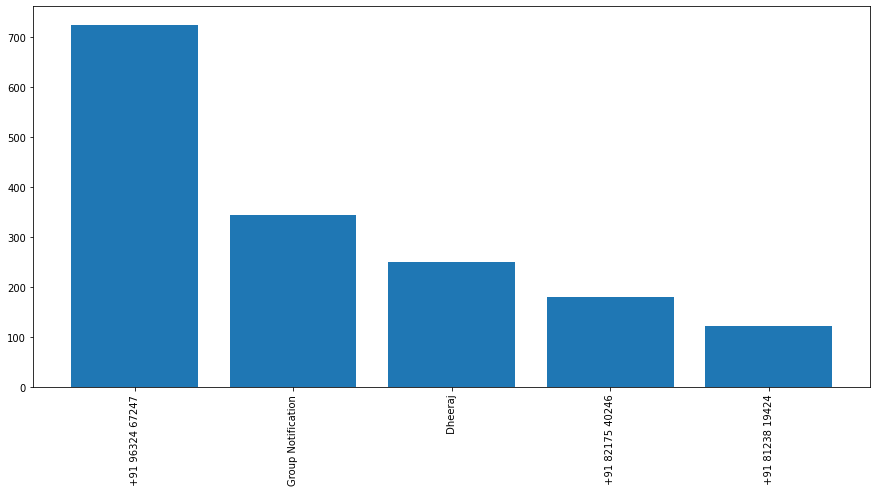

In [25]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')


In [26]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
            
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'to': 686,
 '<Media': 422,
 'omitted>': 422,
 '+91': 322,
 'with': 304,
 'Tap': 273,
 'learn': 271,
 'code': 269,
 'more.': 268,
 'Your': 268,
 'security': 267,
 'changed.': 267,
 'the': 241,
 'was': 231,
 'This': 229,
 'message': 222,
 'is': 220,
 'deleted': 215,
 'class': 160,
 'Yes': 154,
 'and': 141,
 'No': 141,
 'for': 136,
 'in': 133,
 'of': 126,
 'sir': 123,
 'not': 117,
 'will': 112,
 'I': 110,
 'we': 105,
 'u': 104,
 'have': 98,
 'this': 95,
 'be': 87,
 'are': 80,
 'you': 80,
 'it': 73,
 'link': 73,
 'can': 58,
 'that': 57,
 'a': 56,
 'at': 55,
 'Join': 55,
 'so': 53,
 '✋': 50,
 'meeting': 49,
 'fast': 47,
 'Okay': 47,
 'time': 46,
 'from': 45,
 'Yeah': 45,
 'join': 44,
 'your': 44,
 'on': 43,
 'all': 42,
 'as': 42,
 'pm': 41,
 'they': 41,
 'IA': 40,
 'or': 38,
 'K': 38,
 '😂': 37,
 "You're": 36,
 'Teams': 36,
 '2': 36,
 'only': 36,
 'students': 36,
 'We': 35,
 'invited': 35,
 'meeting!': 35,
 '👍': 35,
 'if': 35,
 '✋🏻': 35,
 'please': 34,
 'added': 34,
 '?': 33,
 'has': 33,
 '

In [27]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,to,686
1,<Media,422
2,omitted>,422
3,+91,322
4,with,304
5,Tap,273
6,learn,271
7,code,269
8,more.,268
9,Your,268


In [ ]:
a,an,the,you,ok,...

In [29]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. ...,9/1/20 11:51,Group Notification,2020-09-01,2020,9,September,1,Tuesday,11,51
1,<Media omitted>,9/8/20 9:51,+91 96324 67247,2020-09-08,2020,9,September,8,Tuesday,9,51
2,Tdys ADE class is scheduled at 3:30 to 4:30 pm...,10/16/20 10:01,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,1
3,This message was deleted,10/16/20 10:03,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,3
4,,10/16/20 10:03,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,3
...,...,...,...,...,...,...,...,...,...,...,...
3956,Your security code with Sammed Kleit changed....,11/30/21 8:51,Group Notification,2021-11-30,2021,11,November,30,Tuesday,8,51
3957,Your security code with +91 95918 12275 chang...,12/1/21 7:15,Group Notification,2021-12-01,2021,12,December,1,Wednesday,7,15
3958,Your security code with +91 95918 12275 chang...,12/1/21 7:43,Group Notification,2021-12-01,2021,12,December,1,Wednesday,7,43
3959,Your security code with +91 76249 28852 chang...,12/2/21 8:57,Group Notification,2021-12-02,2021,12,December,2,Thursday,8,57


In [31]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon


,0,1
0,<media,422
1,omitted>,422
2,+91,322
3,tap,273
4,learn,271
5,code,269
6,more.,268
7,security,267
8,changed.,267
9,message,222


In [32]:
import emoji

In [37]:
em = []
for messages in "heu efhfeif e😂😂😂🤣🤣😊😊😘😘😘🤷‍♂️🤷‍♂️🤷‍♂️ ":
        em.extend([c for c in messages if c in emoji.UNICODE_EMOJI['en']])
print(em)

['😂', '😂', '😂', '🤣', '🤣', '😊', '😊', '😘', '😘', '😘', '🤷', '♂', '🤷', '♂', '🤷', '♂']


In [38]:
def emojihelp(selecteduser,df):
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
        
    
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    return emojidf


dfmoji = emojihelp('Overall',df)
dfmoji

,0,1
0,😂,189
1,🏻,125
2,✋,87
3,🤣,70
4,👍,66
...,...,...
82,😥,1
83,😍,1
84,🙁,1
85,👋,1


In [39]:
dfmoji.columns = ['Emoji','Count']
dfmoji

,Emoji,Count
0,😂,189
1,🏻,125
2,✋,87
3,🤣,70
4,👍,66
...,...,...
82,😥,1
83,😍,1
84,🙁,1
85,👋,1


In [40]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. ...,9/1/20 11:51,Group Notification,2020-09-01,2020,9,September,1,Tuesday,11,51
1,<Media omitted>,9/8/20 9:51,+91 96324 67247,2020-09-08,2020,9,September,8,Tuesday,9,51
2,Tdys ADE class is scheduled at 3:30 to 4:30 pm...,10/16/20 10:01,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,1
3,This message was deleted,10/16/20 10:03,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,3
4,,10/16/20 10:03,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,3


In [41]:
'''
We want the count of messages month-wise,
so we will apply group by and then by 
adding reset_index() we will get the 
result in a dataframe format

then we will add the "Year and month columns" 
like "January-2018",so that to analyze the things become simple

'''


def monthtimeline(selecteduser,df):


    temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index().sort_values(['Message'])
    
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
        
    temp['Time'] = time
    
    return temp

In [16]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
1,"Chinmayee created group ""AGI OFFICIAL@IT 2018-22""",16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
2,Chinmayee added you,16/08/18 20:09,Group Notification,2018-08-16,2018,8,August,16,Thursday,20,9
3,Hello this is official grup,16/08/18 20:09,Chinmayee,2018-08-16,2018,8,August,16,Thursday,20,9
4,Chusinam leaaa,16/08/18 20:10,Jagss,2018-08-16,2018,8,August,16,Thursday,20,10


In [45]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2020,9,September,2
1,2020,10,October,842
2,2020,11,November,735
3,2020,12,December,454
4,2021,1,January,183
5,2021,2,February,156
6,2021,3,March,216
7,2021,4,April,234
8,2021,5,May,120
9,2021,6,June,307


In [46]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2020,9,September,2
1,2020,10,October,842
2,2020,11,November,735
3,2020,12,December,454
4,2021,1,January,183
5,2021,2,February,156
6,2021,3,March,216
7,2021,4,April,234
8,2021,5,May,120
9,2021,6,June,307


In [47]:
temp.shape

(16, 4)

In [48]:
str(temp['Month'][0])+"-"+str(temp['Year'][0])

'September-2020'

In [49]:
time = []
for i in range(temp.shape[0]):
    time.append(temp['Month'][i]+ "-" +str(temp['Year'][i]))
    
temp['Time'] = time

temp

,Year,Month_num,Month,Message,Time
0,2020,9,September,2,September-2020
1,2020,10,October,842,October-2020
2,2020,11,November,735,November-2020
3,2020,12,December,454,December-2020
4,2021,1,January,183,January-2021
5,2021,2,February,156,February-2021
6,2021,3,March,216,March-2021
7,2021,4,April,234,April-2021
8,2021,5,May,120,May-2021
9,2021,6,June,307,June-2021


In [50]:
temp

,Year,Month_num,Month,Message,Time
0,2020,9,September,2,September-2020
1,2020,10,October,842,October-2020
2,2020,11,November,735,November-2020
3,2020,12,December,454,December-2020
4,2021,1,January,183,January-2021
5,2021,2,February,156,February-2021
6,2021,3,March,216,March-2021
7,2021,4,April,234,April-2021
8,2021,5,May,120,May-2021
9,2021,6,June,307,June-2021


In [51]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. ...,9/1/20 11:51,Group Notification,2020-09-01,2020,9,September,1,Tuesday,11,51
1,<Media omitted>,9/8/20 9:51,+91 96324 67247,2020-09-08,2020,9,September,8,Tuesday,9,51
2,Tdys ADE class is scheduled at 3:30 to 4:30 pm...,10/16/20 10:01,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,1
3,This message was deleted,10/16/20 10:03,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,3
4,,10/16/20 10:03,+91 96324 67247,2020-10-16,2020,10,October,16,Friday,10,3


In [52]:
temp1 = df['Day_name'].value_counts()

In [61]:
temp1


Thursday     722
Wednesday    676
Saturday     564
Monday       536
Tuesday      524
Friday       517
Sunday       422
Name: Day_name, dtype: int64

In [64]:
list(temp1.index)
list(temp1.values)



pandas.core.series.Series

In [55]:
list(temp1.values)

[722, 676, 564, 536, 524, 517, 422]

In [65]:
temp2 = df['Month'].value_counts()

In [66]:
temp2

October      931
November     781
December     458
August       451
June         307
April        234
March        216
January      183
February     156
May          120
July          73
September     51
Name: Month, dtype: int64

In [67]:
list(temp2.index),list(temp2.values)

(['October',
  'November',
  'December',
  'August',
  'June',
  'April',
  'March',
  'January',
  'February',
  'May',
  'July',
  'September'],
 [931, 781, 458, 451, 307, 234, 216, 183, 156, 120, 73, 51])